In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# Exercise 1: Advanced Matrix Operations

In [9]:
# Create a 5x5 matrix with random numbers
np.random.seed(42)
matrix = np.random.randint(low = 0, high=50, size=(5,5))

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix)
print("eigenvalues:\n", eigenvalues)
print("eigenvectors:\n", eigenvectors)

eigenvalues:
 [111.87003062 +0.j          13.56730578+25.50974957j
  13.56730578-25.50974957j  17.37534904 +0.j
   9.62000878 +0.j        ]
eigenvectors:
 [[-0.49149952+0.j         -0.32478758-0.28606731j -0.32478758+0.28606731j
   0.58027314+0.j          0.64576321+0.j        ]
 [-0.41940938+0.j         -0.32116171+0.09855648j -0.32116171-0.09855648j
  -0.67380029+0.j         -0.60882724+0.j        ]
 [-0.50106826+0.j         -0.10547905-0.45703564j -0.10547905+0.45703564j
  -0.29066692+0.j          0.28424259+0.j        ]
 [-0.34044629+0.j          0.60500854+0.j          0.60500854-0.j
   0.21433864+0.j         -0.17788738+0.j        ]
 [-0.46427461+0.j          0.04168813+0.33472327j  0.04168813-0.33472327j
   0.28079876+0.j          0.31604034+0.j        ]]


In [10]:
# Perform Matrix Normalization
# Feature Scaling
normalized = (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix))
normalized

array([[0.88095238, 0.64285714, 0.30952381, 0.97619048, 0.14285714],
       [0.45238095, 0.88095238, 0.4047619 , 0.5       , 0.21428571],
       [0.21428571, 0.52380952, 0.80952381, 0.9047619 , 0.52380952],
       [0.02380952, 0.47619048, 0.        , 0.52380952, 1.        ],
       [0.66666667, 0.85714286, 0.        , 0.45238095, 0.73809524]])

# Exercise 2: Statistical Distribution Analysis

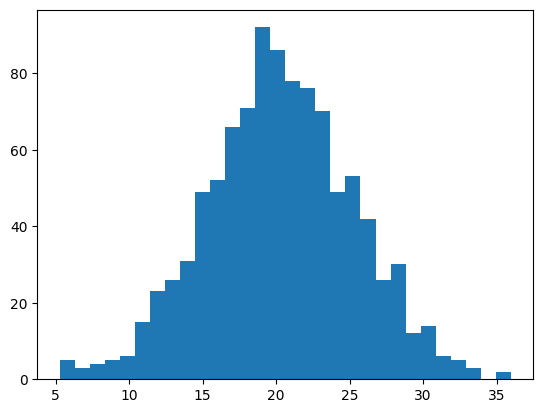

In [12]:
data = np.random.normal(loc=20, scale=5, size=(1000))

plt.hist(data, bins=30)
plt.show()

In [14]:
# Skewness
skewness = stats.skew(data)
print(skewness)

-0.03450871978937656


In [15]:
# Kurtosis
kurt = stats.kurtosis(data)
print(kurt)

0.04740885516034643


# Exercise 3: Time Series Forecasting

Historical Sales Data:
Month 1: $202
Month 2: $448
Month 3: $370
Month 4: $206
Month 5: $171
Month 6: $288
Month 7: $120
Month 8: $202
Month 9: $221
Month 10: $314
Month 11: $430
Month 12: $187

Linear Regression Model:
Slope (trend): -2.51
Intercept: 279.59
Equation: Sales = -2.51 × Month + 279.59

Forecasted Sales (Next 6 Months):
Month 13: $246.91
Month 14: $244.40
Month 15: $241.88
Month 16: $239.37
Month 17: $236.85
Month 18: $234.34


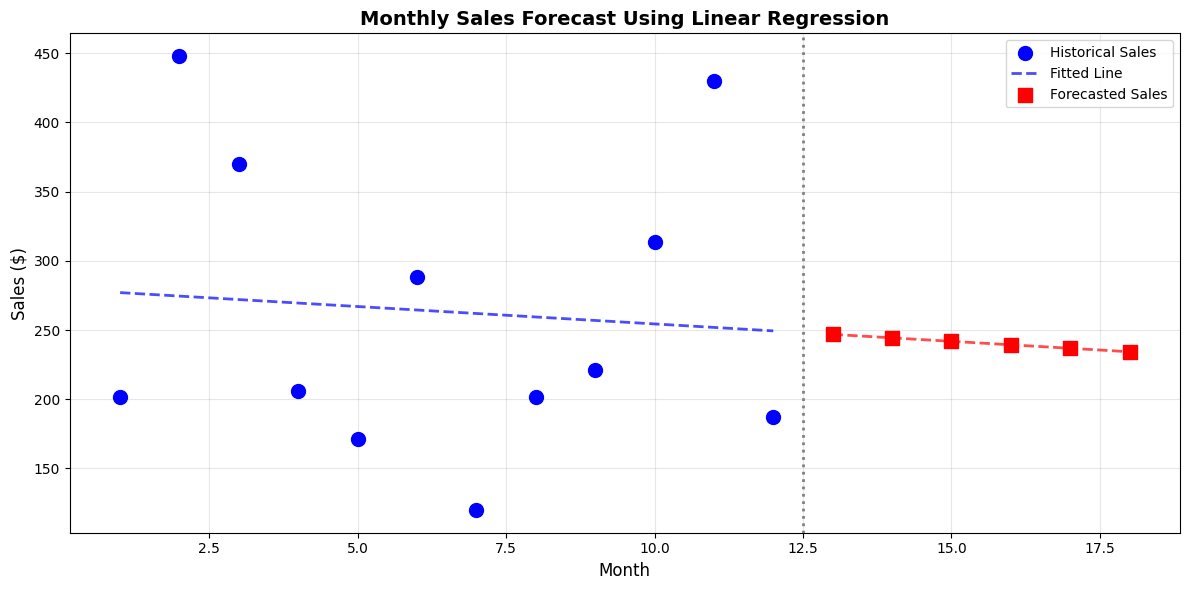


Model Performance (R² Score): 0.0073


In [20]:
from sklearn.linear_model import LinearRegression

# Generate sample monthly sales data
np.random.seed(42)  # For reproducibility
monthly_sales_data = np.random.randint(100, 500, size=12)

# Create time indices (months 1-12)
months = np.arange(1, 13).reshape(-1, 1)  # Reshape for sklearn

# Create and train the linear regression model
model = LinearRegression()
model.fit(months, monthly_sales_data)

# Forecast future months (e.g., next 6 months)
future_months = np.arange(13, 19).reshape(-1, 1)
forecasted_sales = model.predict(future_months)

# Get predictions for historical data (for visualization)
historical_predictions = model.predict(months)

# Print results
print("Historical Sales Data:")
for i, sales in enumerate(monthly_sales_data, 1):
    print(f"Month {i}: ${sales}")

print(f"\nLinear Regression Model:")
print(f"Slope (trend): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Equation: Sales = {model.coef_[0]:.2f} × Month + {model.intercept_:.2f}")

print("\nForecasted Sales (Next 6 Months):")
for i, sales in enumerate(forecasted_sales, 13):
    print(f"Month {i}: ${sales:.2f}")

# Visualization
plt.figure(figsize=(12, 6))

# Plot historical data
plt.scatter(months, monthly_sales_data, color='blue', s=100, 
            label='Historical Sales', zorder=3)

# Plot regression line through historical data
plt.plot(months, historical_predictions, color='blue', 
         linestyle='--', linewidth=2, label='Fitted Line', alpha=0.7)

# Plot forecasted data
plt.scatter(future_months, forecasted_sales, color='red', s=100, 
            label='Forecasted Sales', marker='s', zorder=3)

# Plot forecast line
plt.plot(future_months, forecasted_sales, color='red', 
         linestyle='--', linewidth=2, alpha=0.7)

# Formatting
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.title('Monthly Sales Forecast Using Linear Regression', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.axvline(x=12.5, color='gray', linestyle=':', linewidth=2, label='Forecast Start')

plt.tight_layout()
plt.show()

# Calculate R² score for model evaluation
from sklearn.metrics import r2_score
r2 = r2_score(monthly_sales_data, historical_predictions)
print(f"\nModel Performance (R² Score): {r2:.4f}")

# Exercise 4 : Pandas Data Aggregation

In [21]:
# Creating a sample Pandas DataFrame
data = {
    'Product': ['Product A', 'Product B', 'Product C', 'Product A', 'Product B'],
    'Sales': [200, 150, 300, 250, 180],
    'Month': ['January', 'February', 'March', 'April', 'May']
}
df = pd.DataFrame(data)
df

,Product,Sales,Month
0,Product A,200,January
1,Product B,150,February
2,Product C,300,March
3,Product A,250,April
4,Product B,180,May


In [28]:
# Using a Pandas DataFrame, demonstrate grouping and aggregation techniques to summarize the data effectively.
product_sales = df.groupby('Product')['Sales'].agg(['sum', 'mean'])
product_sales

,sum,mean
Product,,
Product A,450,225.0
Product B,330,165.0
Product C,300,300.0
